In [3]:
%pylab inline

from __future__ import print_function
from __future__ import division

import pandas
import matplotlib
import seaborn

from matplotlib import pyplot

Populating the interactive namespace from numpy and matplotlib


In [19]:
shards = pandas.read_csv('csv/experiment-hashed.csv', header = None, names = ['shard' + str(x) for x in range(5)] + ['total'], index_col = 'total')

In [11]:
shardc = list(set(shards.columns) - {'total'})

In [17]:
pylab.rcParams['figure.figsize'] = 16, 8

In [45]:
shards.index.name = u'Procesos Totales'

In [159]:
next(shards.iteritems())

('shard0', Procesos Totales
 20000       3971
 40000       7909
 60000      11956
 80000      15974
 100000     20071
 120000     24147
 140000     28200
 160000     32277
 180000     36232
 200000     40246
 220000     44209
 240000     48225
 260000     52189
 280000     56221
 300000     60203
 320000     64110
 340000     68062
 360000     72029
 380000     76019
 400000     79906
 420000     84029
 440000     88088
 460000     92113
 480000     96097
 500000    100074
 Name: shard0, dtype: int64)

In [168]:
'asdf'.title()

'Asdf'

In [169]:
import re

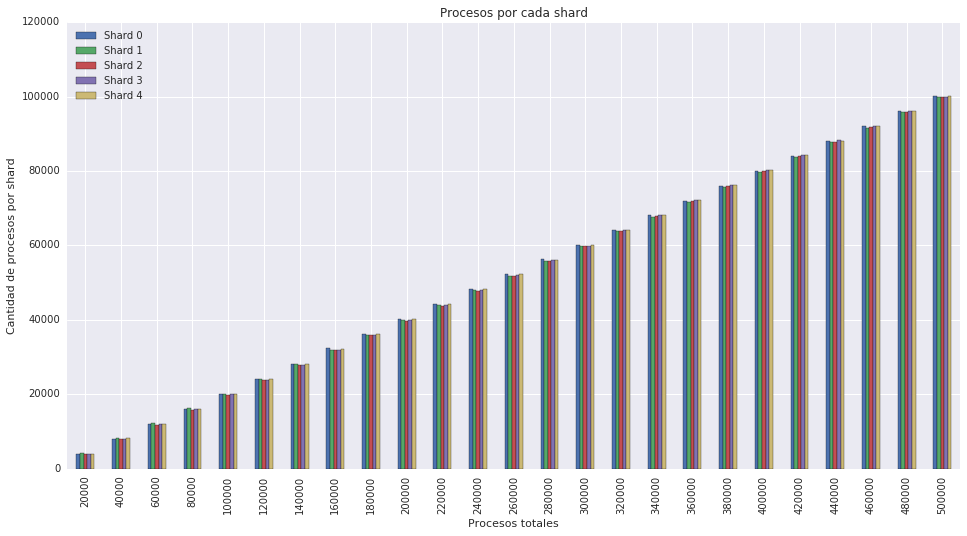

In [173]:
ax = shards.rename(columns = lambda s: '{} {}'.format(s[:5], s[5]).title()).plot(kind = 'bar', title = 'asdf')

ax.set_title('Procesos por cada shard')
ax.set_ylabel('Cantidad de procesos por shard')
ax.set_xlabel('Procesos totales')

pyplot.savefig('process_by_shard.png')

In [143]:
ax.hlines

<bound method AxesSubplot.hlines of <matplotlib.axes._subplots.AxesSubplot object at 0xee149d0>>

In [146]:
t

In [145]:
ax.lines

[]

In [144]:
ax.vlines

<bound method AxesSubplot.vlines of <matplotlib.axes._subplots.AxesSubplot object at 0xee149d0>>

In [151]:
f = ax.legend()

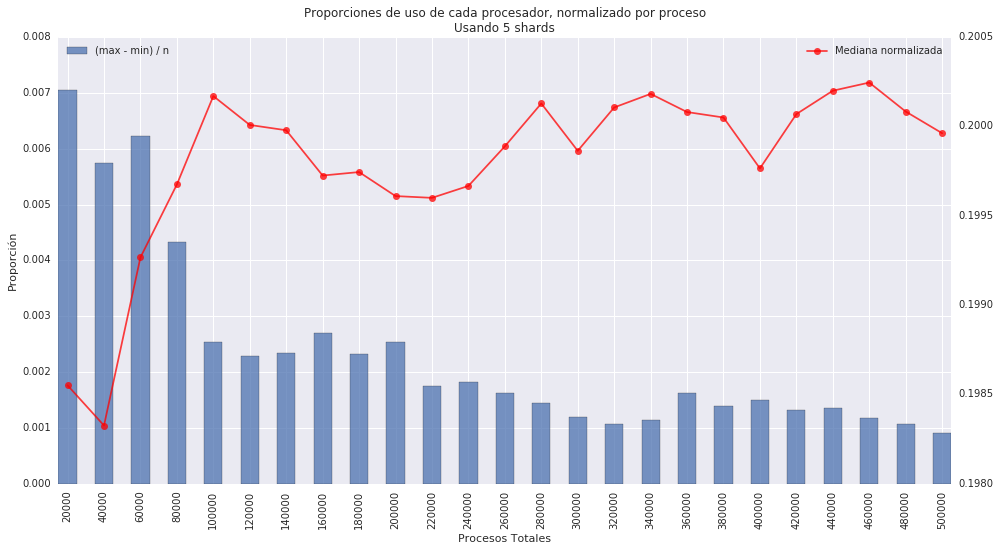

In [174]:
pyplot.title(u'Proporciones de uso de cada procesador, normalizado por proceso\nUsando 5 shards')
pyplot.ylabel(u'Proporción')

pt = pandas.DataFrame({
    u'Proporción': shards.apply(lambda s: (s.max() - s.min()) / s.name, axis = 1),
    'Mediana': shards.apply(lambda s: s.median() / s.name, axis = 1)
})

ax = pt[u'Proporción'].plot(alpha = .75, kind = 'bar', label = '(max - min) / n')

pyplot.legend(loc = 2)

ax2 = ax.twinx()
ax2.grid()
t, = ax2.plot(ax.get_xticks(), pt['Mediana'].values, alpha = .75, color = 'r', marker = 'o', label = 'Mediana normalizada')

pyplot.legend(loc = 0)

pyplot.savefig('range_median_normalized.png')

# Boxplots

In [4]:
shards = pandas.read_csv('csv/experiment-hashed.csv')

In [9]:
shards.head()

,shard1,shard2,shard3,shard4,shard5,total
0,3911,4022,4085,3956,4026,20000
1,3958,4036,4023,3986,3997,20000
2,3970,3957,3934,4134,4005,20000
3,3994,4047,3986,4047,3926,20000
4,4001,4034,3952,4044,3969,20000


In [54]:
shards[shards.total == 20000]

,shard1,shard2,shard3,shard4,shard5,total
0,3911,4022,4085,3956,4026,20000
1,3958,4036,4023,3986,3997,20000
2,3970,3957,3934,4134,4005,20000
3,3994,4047,3986,4047,3926,20000
4,4001,4034,3952,4044,3969,20000
5,4002,3913,3986,4027,4072,20000
6,4018,4002,4036,4105,3839,20000
7,4019,3954,4138,3953,3936,20000
8,4054,3957,4023,4005,3961,20000
9,4085,3993,3982,3943,3997,20000


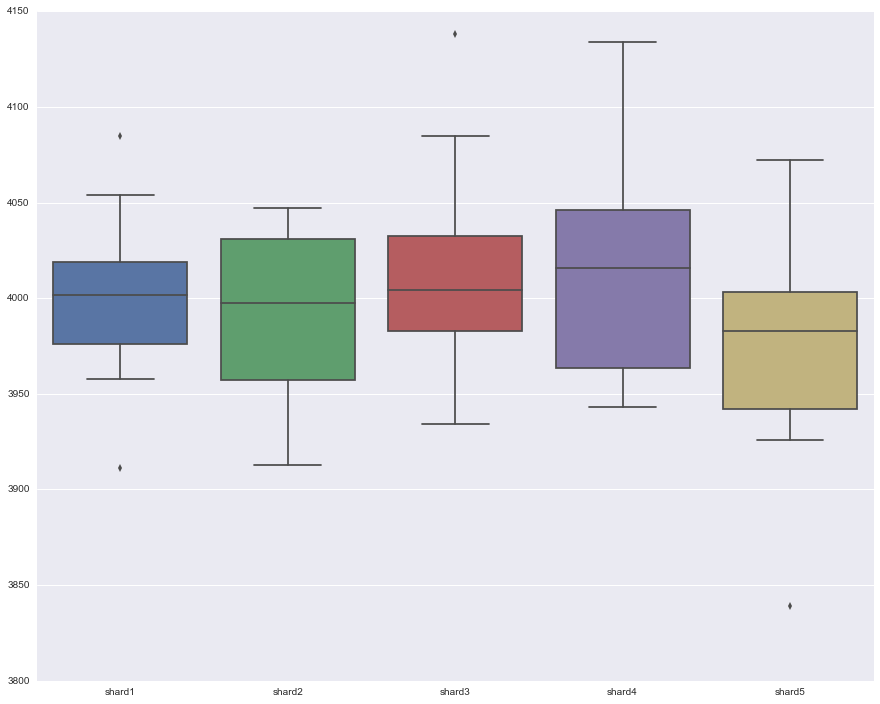

In [53]:
seaborn.boxplot(shards[shards.total == 20000].drop('total', axis = 1))

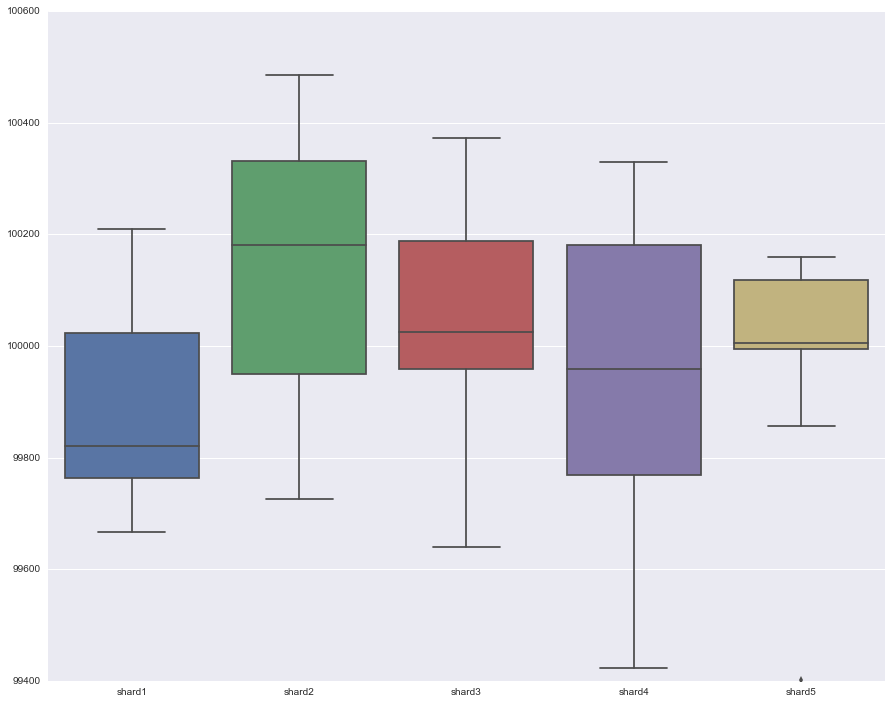

In [56]:
seaborn.boxplot(shards[shards.total == shards.total.max()].drop('total', axis = 1))

In [21]:
pe = shards.drop('total', axis = 1).apply(lambda s: s / shards.total)

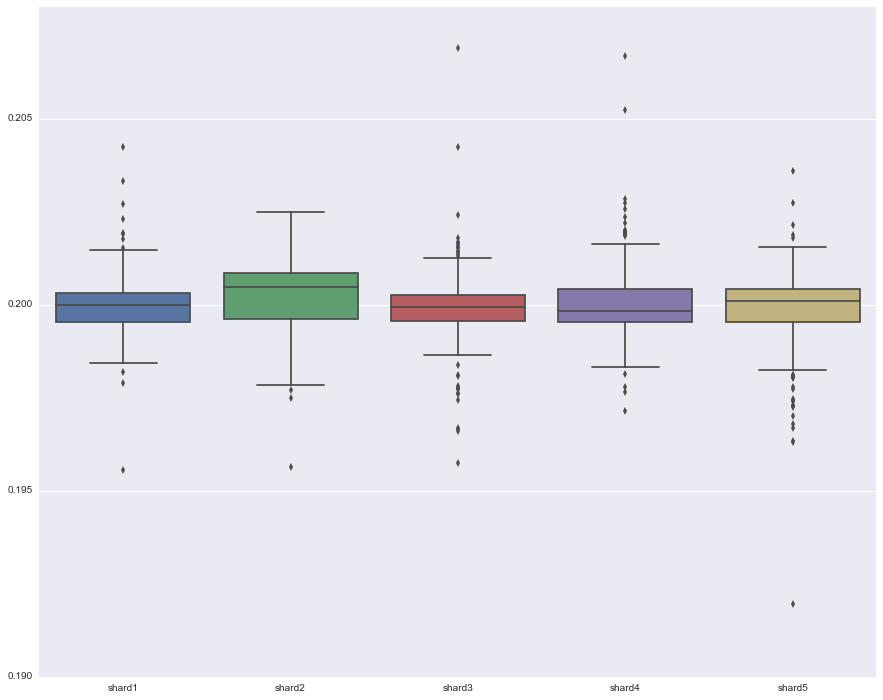

In [52]:
seaborn.boxplot(pe)

In [26]:
pe.mean()

shard1    0.200007
shard2    0.200227
shard3    0.199905
shard4    0.200027
shard5    0.199835
dtype: float64

In [25]:
pe.std()

shard1    0.000810
shard2    0.001019
shard3    0.001005
shard4    0.000998
shard5    0.001136
dtype: float64

In [80]:
rcParams['figure.figsize'] = 5, 4

In [87]:
shards.rename(columns = lambda x: 'total' if x == 'total' else '{} {}'.format(x[:5].title(), x[5]), inplace = True)

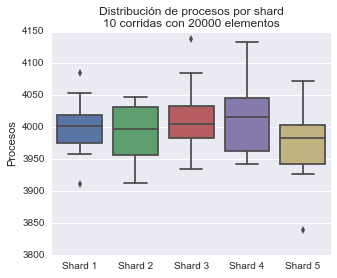

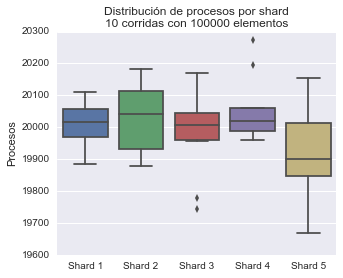

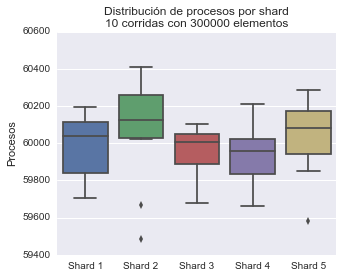

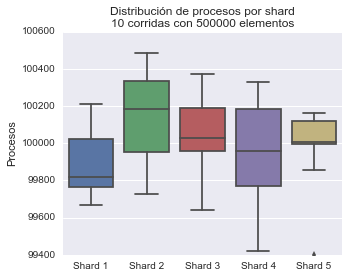

In [123]:
for total, group in shards[shards.total.isin([20000, 100000, 300000, 500000])].groupby('total'):
    pyplot.title(u'Distribución de procesos por shard\n10 corridas con {} elementos'.format(total))
    seaborn.boxplot(group.drop('total', axis = 1))
    
    pyplot.ylabel('Procesos')
    pyplot.savefig('../informe/imagenes/boxplots/boxplot_{}.png'.format(total))
    pyplot.show()

In [96]:
type(pandas.concat([x for _, x in group.drop('total', axis = 1).iteritems()], ignore_index = True))

pandas.core.series.Series

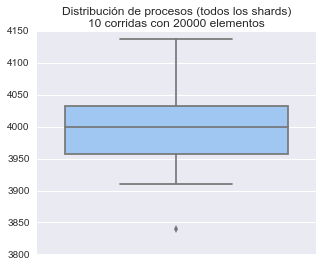

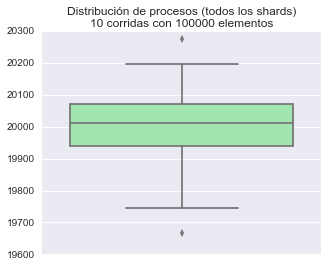

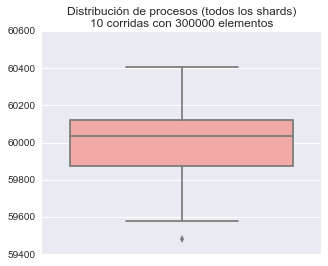

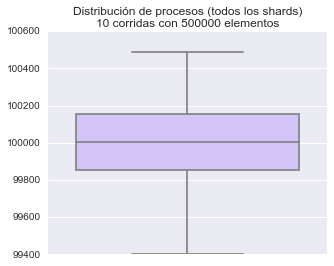

In [126]:
for e, (total, group) in enumerate(shards[shards.total.isin([20000, 100000, 300000, 500000])].groupby('total')):
    pyplot.title(u'Distribución de procesos (todos los shards)\n10 corridas con {} elementos'.format(total))
    seaborn.boxplot(
        pandas.concat(
            [x for _, x in group.drop('total', axis = 1).iteritems()],
            ignore_index = True
        ).rename('').to_frame(),
        color = seaborn.color_palette('pastel', 4)[e]
    )
    pyplot.savefig('../informe/imagenes/boxplots/boxplot_total_{}.png'.format(total))
    pyplot.show()

In [132]:
p

,Shard 1,Shard 2,Shard 3,Shard 4,Shard 5
240,100055,99725,100211,99849,100160
241,100061,100117,99639,100048,100135
242,100210,100104,100270,99423,99993
243,99667,100334,100372,100226,99401
244,99762,100325,100055,99732,100126
245,99764,100356,99908,99878,100094
246,99765,100246,99950,100039,100000
247,99771,99899,99996,100330,100004
248,99869,99742,100122,100259,100008
249,99929,100485,99987,99743,99856


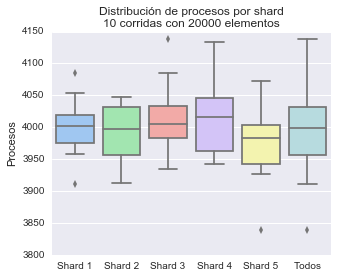

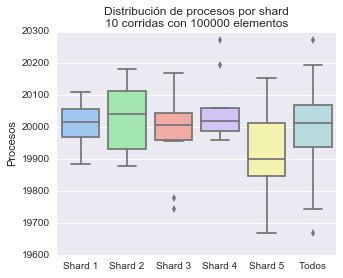

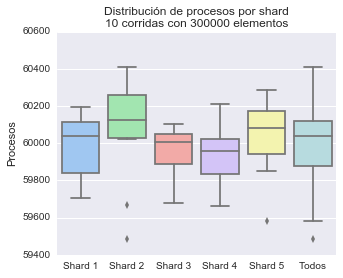

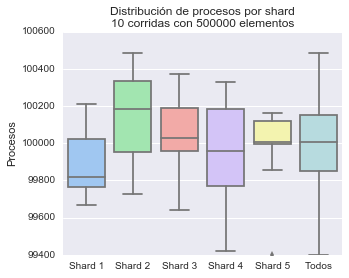

In [162]:
for total, group in shards[shards.total.isin([20000, 100000, 300000, 500000])].groupby('total'):
    pyplot.title(u'Distribución de procesos por shard\n10 corridas con {} elementos'.format(total))
    p = group.drop('total', axis = 1)
    p = p.append(pandas.concat([x for _, x in p.iteritems()]).to_frame('Todos'))
    seaborn.boxplot(p, palette = seaborn.color_palette('pastel'))
    
    pyplot.ylabel('Procesos')
    pyplot.savefig('../informe/imagenes/boxplots/boxplot_{}.png'.format(total))
    pyplot.show()